# StackOverflow 2018 Survey



## Overview  

This analysis attempts to provide insights for individuals who have a Ph.D. in a field other than Computer Science who are interested in transitioning to a computing-centric field. Important tools, career paths, and factors influencing success (as measured by salary) are extracted from a StackOverflow survey dataset from 2018. The workflow is intended to loosely follow the Cross-Industry Process for Data Mining model (CRISP-DM), which entails (i) establishing a business understanding of the task at hand, (ii) understanding the data, (iii), preparing the data, (iv) modeling, (v) evaluating the model, and, finally, (vi) deploying the results. 

## Business Understanding  

All too commonly, students who pursue a Ph.D. and then decide to transition to industry find it challenging to procure a position that is both highly satisfying and well-paying. Based on personal stories from friends and acquaintances, I assume that career frustration is particularly likely for those who study the fine arts, the humanities, or even a natural science. Compared to those who study a field in high demand, such as Computer Science, the path to a satisfying career can be daunting.  

Many find that they need to take concrete steps to adapt their analytical skills for industry needs. This includes learning modern data analysis tools, *e.g.*, statistical software, one or more computer programming languages, machine learning, *etc*. For PhDs who decide to 'up-skill' and make a career transition, several questions seem particularly relevant:

1. How prevelant are non-Computer Science PhDs in computing-centric fields?
2. What are the top job prospects for this demographic?
3. Which tools are the most important to learn?
4. Is the lack of a Computer Science degree a significant detriment?

## Data Understanding  



To answer the above questions, I used data from the StackOverflow developer survey from 2018. Throughout this analysis, I made at least one major assumption (which was most certainly inaccurate): I assumed that the survey results were a representative sample from the population of all the world's developers. The data exploration below eventually revealed certain biases in the data, but the assumption seemed reasonable for the sake of finding approximate answers. 

To begin the analysis, I started by importing necessary libraries.

In [2]:
# Import relevant objects from the standard library
from   collections import Counter
from   pathlib import Path
from   pprint import pprint

# Import needed third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Adjust settings so matplotlib graphs show in the notebook
%matplotlib inline

The data from StackOverflow came as two distinct files - one containing the survey results, and a second containing the schema to interpret the survey data. I loaded the survey results into a pandas dataframe.

In [3]:
csv_path = Path("../data/survey_results_public.csv")
df = pd.read_csv(csv_path, low_memory=False)

Typically, I begin by checking what features are available, what the data types are, and how many records are included. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


Because so many features were included, I found it easier to inspect the schema csv file to become familiar with the features. Nearly 100k records were available.  

The first feature I investigated was the Formal Education field, which indicated the highest level of education attained by each respondent. I needed to define a helper function first that would enhance the visualization of the data.

In [24]:
def add_bar_values(ax, space=0.1):
    """Show numeric values for each category in a barchart
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to be labeled with numeric values
    
    space : float
        Distance to put between bar and numeric label
    """
    
    for p in ax.patches:
        x = p.get_x() + p.get_width() + float(space)
        y = p.get_y() + p.get_height()
        value = int(p.get_width())
        ax.text(x, y, value, ha='left', va='bottom')

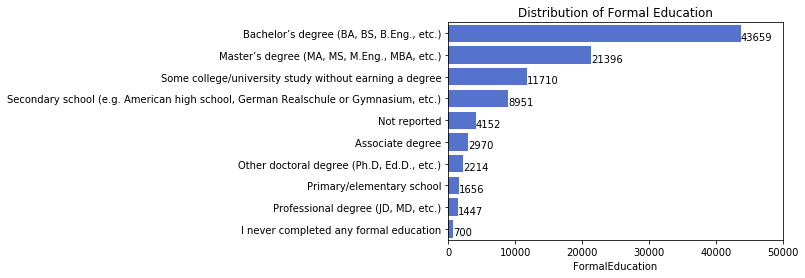

In [30]:
degree_breakdown = df.FormalEducation.fillna('Not reported').value_counts()
fig1 = sns.barplot(x=degree_breakdown, y=degree_breakdown.index, color='royalblue')
add_bar_values(fig1)
plt.xlim(0, 50000)
plt.title("Distribution of Formal Education")
plt.show()

Bachelor's and Master's students dominated the distribution. The survey did not distinguish between the various 'flavors' of doctoral degrees other than to separate out M.D.'s and J.D.'s from all others. For simplicity, I referred to the 'Other doctoral degree' segment as simply Ph.D.'s for the remainder of the analysis. A total of 2214 respondents indicated that they attained this level of education.  

Next, I broke down the Undergrad Major features to get a sense of what fields were studied by the respondents.

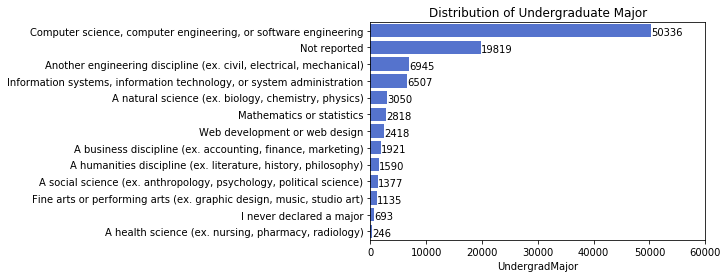

In [31]:
undergrad_breakdown = df.UndergradMajor.fillna('Not reported').value_counts()
fig2 = sns.barplot(x=undergrad_breakdown, y=undergrad_breakdown.index, color='royalblue')
add_bar_values(fig2)
plt.xlim(0, 60000)
plt.title('Distribution of Undergraduate Major')
plt.show()

The category "Computer science, computer engineering, or software engineering" was by far the most prevelant field. Other STEM fields represented most of the other categories.

Next, I created a similar breakdown, only filtering this time for respondents that had earned a Ph.D.

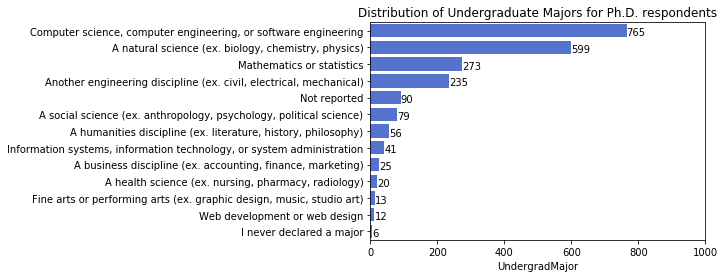

In [34]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
phd_field_breakdown = df.UndergradMajor.fillna('Not reported')[is_phd].value_counts()
fig3 = sns.barplot(x=phd_field_breakdown, y=phd_field_breakdown.index, color='royalblue')
add_bar_values(fig3)
plt.xlim(0, 1000)
plt.title('Distribution of Undergraduate Majors for Ph.D. respondents')
plt.show()

Making the assumption that all Ph.D. students studied the same field in both their undergraduate and graduate studies, I was able to calculate the percentage of the respondents that achieved a Ph.D., but decided not to study Computer Science.

In [37]:
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')
total_n = len(df)
num_phd = sum(is_phd)
num_not_compsci = sum(~is_compsci)
num_both = len(df[is_phd & ~is_compsci])
fraction_phd = num_phd / total_n
fraction_not_compsci = num_not_compsci / total_n
fraction_both = num_both / total_n

print(f"Total respondents: {total_n}\n")
print(f"Number of respondents without computer science undergrad degree: {num_not_compsci}")
print(f"Number of respondents with PhD: {num_phd}")
print(f"Number of respondents without compsci degree, but with PhD: {num_like_me}\n")
print(f"Fraction of respondents without computer science undergrad degree: {fraction_not_compsci:.3f}")
print(f"Fraction of respondents with PhD: {fraction_phd:.3f}")
print(f"Fraction of respondents with both conditions: {fraction_both:.3f}")


Total respondents: 98855

Number of respondents without computer science undergrad degree: 48519
Number of respondents with PhD: 2214
Number of respondents without compsci degree, but with PhD: 1449

Fraction of respondents without computer science undergrad degree: 0.491
Fraction of respondents with PhD: 0.022
Fraction of respondents with both conditions: 0.015


Only 1.5% of the respondents fit the above description.

To answer the more specific question of "How prevalent are non-compsci Ph.D.'s in computing-centric fields", I needed to determine how many of the respondents were employed as a developer.

In [50]:
df.Employment.unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [60]:
is_employed = df.Employment.isin([
    'Employed part-time', 
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed',
])

I also needed to inspect the types of jobs represented in the survey. The survey allowed respondents to indicate multiple developer types for their current employment, so I tabulated the number of times each category was chosen.

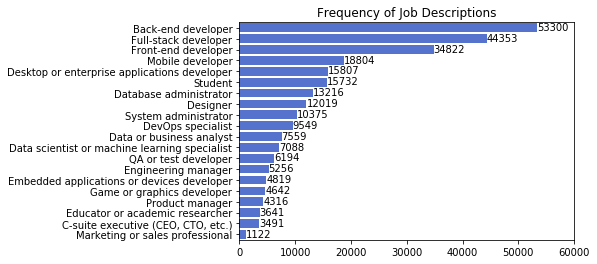

In [58]:
dev_list = list()
for answer in df.DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_list.append(item)
dev_counts = Counter(dev_list)

dev_df = pd.Series(dict(dev_counts))
dev_df = dev_df.sort_values(ascending=False)
fig4 = sns.barplot(x=dev_df, y=dev_df.index, color='royalblue')
add_bar_values(fig4)
plt.title("Frequency of Job Descriptions")
plt.xlim(0, 60000)
plt.show()

Most of the job types could be classified as "computer-centric", so I made the approximation that all employed respondents were in some way involved in a computer centric position. Question 1 could then be addressed as follows:

In [71]:
total_employed = sum(is_employed)
target_demographic = sum(is_employed & is_phd & ~is_compsci)
question_1_ans = target_demographic / total_employed

print(f"Total number of employed respondents: {total_employed}")
print(f"Total number of non-compsci Ph.D.s employed in a computer centric job: {target_demographic}")
print(f"The total fraction of non-compsci Ph.D.s employed in a computer-centric job was: {question_1_ans:.3f}")

Total number of employed respondents: 85157
Total number of non-compsci Ph.D.s employed in a computer centric job: 1357
The total fraction of non-compsci Ph.D.s employed in a computer-centric job was: 0.016


**Question 1:** How prevelant are non-Computer Science Ph.D.s in computing-centric fields?  
**Answer:** Not very. In the StackOverflow survey, 1.6% of employees in a computer-centric job indicated that they were non-Computer Science Ph.D.s

To double check the above assumption, I tabulated the number of times each category of developer type was chosen by a non-compsci Ph.D., and the assumption seemed to hold.

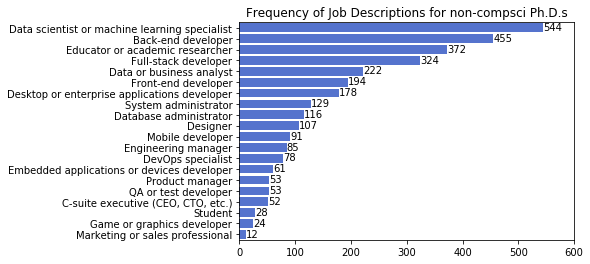

In [72]:
phd_dev_list = list()
for answer in df[is_phd & ~is_compsci & is_employed].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_list.append(item)
phd_dev_counts = Counter(phd_dev_list)

phd_dev_df = pd.Series(dict(phd_dev_counts))
phd_dev_df = phd_dev_df.sort_values(ascending=False)
fig5 = sns.barplot(x=phd_dev_df, y=phd_dev_df.index, color='royalblue')
add_bar_values(fig5)
plt.title("Frequency of Job Descriptions for non-compsci Ph.D.s")
plt.xlim(0, 600)
plt.show()

The above graph also helped to answer my next question:

**Question 2:** What are the top computing-centric job prospects for Non-Computer Science Ph.D.'s?  
**Answer:** The top three jobs for Non-Computer Science Ph.D.'s in the StackOverflow dataset include (1) Data scientist or machine learning specialist, (2) Back-end developer, and (3) Educator or academic researcher.

In [266]:
print(len(df[~is_compsci & ~is_phd]))
print(len(df[~is_compsci & is_phd]))
print(len(df[is_compsci & ~is_phd]))
print(len(df[is_compsci & is_phd]))

47070
1449
49571
765


In [7]:
pprint(list(df.UndergradMajor.unique()))

['Mathematics or statistics',
 'A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'Information systems, information technology, or system administration',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 nan,
 'A business discipline (ex. accounting, finance, marketing)',
 'A social science (ex. anthropology, psychology, political science)',
 'Web development or web design',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A health science (ex. nursing, pharmacy, radiology)',
 'I never declared a major']


In [6]:
pprint(list(df.FormalEducation.unique()))

['Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Associate degree',
 'Some college/university study without earning a degree',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, '
 'etc.)',
 nan,
 'Primary/elementary school',
 'Professional degree (JD, MD, etc.)',
 'I never completed any formal education',
 'Other doctoral degree (Ph.D, Ed.D., etc.)']


In [24]:
undergrad_counter = Counter(df.UndergradMajor)
undergrad_data = pd.Series(dict(undergrad_counter))
undergrad_data = undergrad_data.reset_index()
undergrad_data.columns = ['major', 'count']
undergrad_data

,major,count
0,Mathematics or statistics,2818
1,"A natural science (ex. biology, chemistry, phy...",3050
2,"Computer science, computer engineering, or sof...",50336
3,Fine arts or performing arts (ex. graphic desi...,1135
4,"Information systems, information technology, o...",6507
5,"Another engineering discipline (ex. civil, ele...",6945
6,NaN,19819
7,"A business discipline (ex. accounting, finance...",1921
8,"A social science (ex. anthropology, psychology...",1377
9,Web development or web design,2418


In [8]:
sum(df.FormalEducation == 'Other doctoral degree (Ph.D, Ed.D., etc.)')

2214

In [9]:
sum(df.FormalEducation == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)')

21396

In [10]:
sum(df.UndergradMajor.isin(['A natural science (ex. biology, chemistry, physics)', 'Another engineering discipline (ex. civil, electrical, mechanical)']))

9995

In [11]:
df.isnull().any().sum()

126

In [48]:
pprint(list(df.HopeFiveYears.unique()))

['Working as a founder or co-founder of my own company',
 "Working in a different or more specialized technical role than the one I'm "
 'in now',
 'Doing the same work',
 nan,
 'Working as an engineering manager or other functional manager',
 'Working in a career completely unrelated to software development',
 'Working as a product manager or project manager',
 'Retirement']


# Getting Serious

## Question 2: How do I compare with others in terms of years coding?

In [355]:
def plot_cat_feature_dist(data, sorted_index, title, xlabel, color):
    dist = data.value_counts(dropna=False)
    dist_index = dist.index.fillna('Not reported')
    dist = dist.reindex(sorted_index)
    
    g = sns.barplot(x=dist.index, y=dist, color=color)
    
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    
    return g

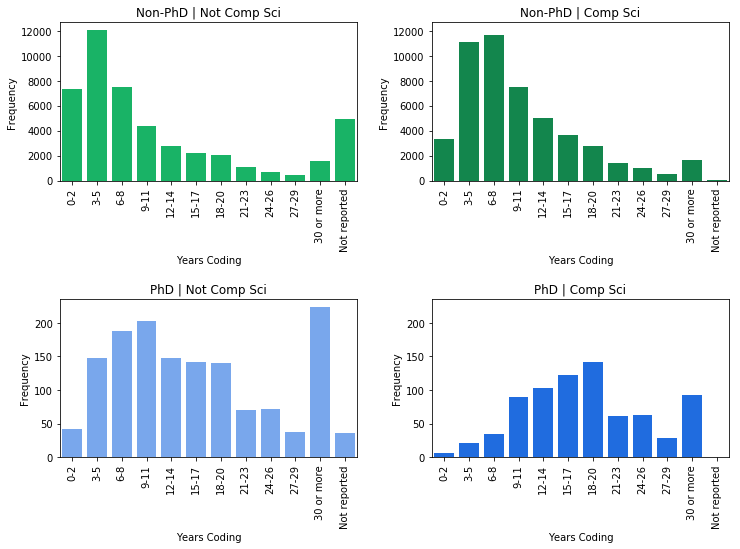

In [365]:
years_coding_df = df.YearsCoding.str.replace(' years', '').replace(np.nan, 'Not reported')

coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          years_coding_df[is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          years_coding_df[is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

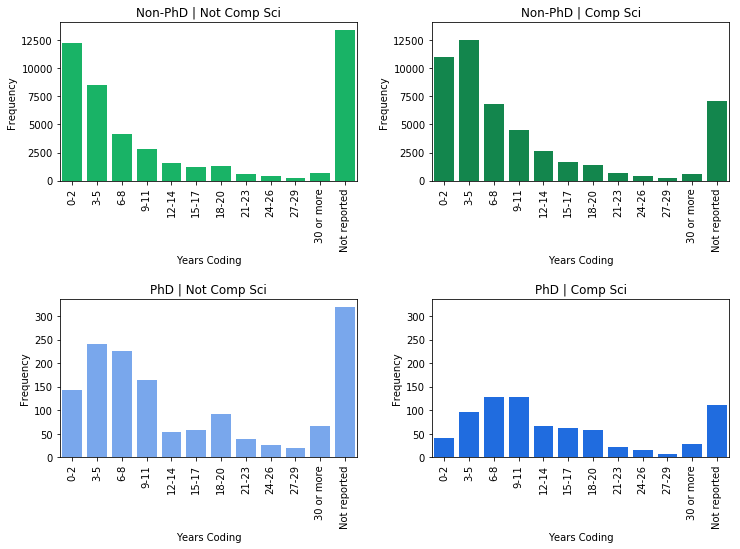

In [367]:
prof_years_coding_df = df.YearsCodingProf.str.replace(' years', '').replace(np.nan, 'Not reported')

prof_coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

## Where should I be working?

In [241]:
dev_types = set()
for answer in df.DevType.unique():
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_types.add(item)
pprint(dev_types)

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator'}


In [240]:
phd_dev_types = set()
for answer in df[is_phd & ~is_compsci].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_types.add(item)
pprint(phd_dev_types)

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator'}


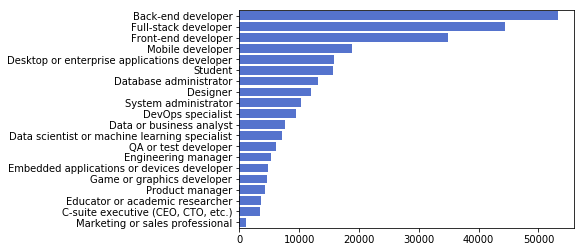

In [264]:
dev_list = list()
for answer in df.DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_list.append(item)
dev_counts = Counter(dev_list)

dev_df = pd.Series(dict(dev_counts))
dev_df = dev_df.sort_values(ascending=False)
sns.barplot(x=dev_df, y=dev_df.index, color='royalblue')
plt.show()

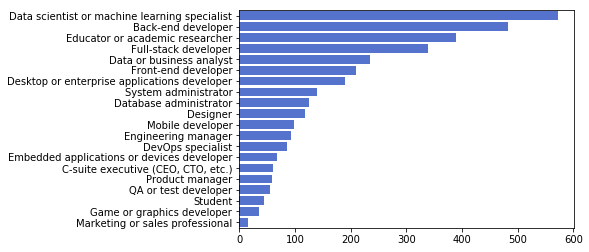

In [263]:
phd_dev_list = list()
for answer in df[is_phd & ~is_compsci].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_list.append(item)
phd_dev_counts = Counter(phd_dev_list)

phd_dev_df = pd.Series(dict(phd_dev_counts))
phd_dev_df = phd_dev_df.sort_values(ascending=False)
sns.barplot(x=phd_dev_df, y=phd_dev_df.index, color='royalblue')
plt.show()

## Job satisfaction

In [397]:
phd_jobs = df.loc[is_phd & ~is_compsci, ('JobSatisfaction', 'DevType')]

In [398]:
phd_jobs.JobSatisfaction.unique()

array(['Slightly satisfied', 'Extremely satisfied',
       'Slightly dissatisfied', 'Moderately satisfied', nan,
       'Moderately dissatisfied', 'Neither satisfied nor dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [401]:
satisfaction_mapping = {
    'Extremely dissatisfied': 0,
    'Moderately dissatisfied': 1,
    'Slightly dissatisfied': 2, 
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4, 
    'Moderately satisfied': 5, 
    'Extremely satisfied': 6,
    np.nan: np.nan,
}

phd_jobs['JobSatisfactionOrd'] = phd_jobs['JobSatisfaction'].replace(satisfaction_mapping)

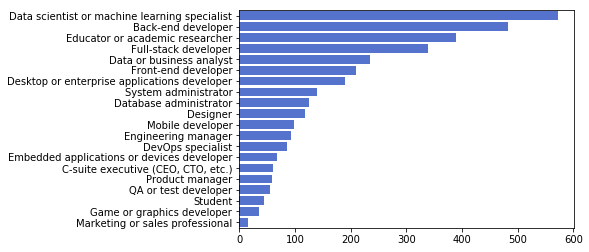

In [421]:
phd_dev_list = list()
for idx, response in good_jobs.iterrows():
    dev_type = response.DevType
    satisfaction = response.JobSatisfactionOrd
    if dev_type is not np.nan:
        for job in dev_type.split(';'):
            phd_dev_list.append((job, satisfaction))
phd_dev_df = pd.DataFrame(phd_dev_list, columns=['Job', 'Satisfaction'])
phd_dev_counts = Counter([response[0] for response in phd_dev_list])

phd_dev_counts = pd.Series(dict(phd_dev_counts))
phd_dev_counts = phd_dev_counts.sort_values(ascending=False)
sns.barplot(x=phd_dev_counts, y=phd_dev_counts.index, color='royalblue')
plt.show()

In [422]:
phd_dev_df.head()

,Job,Satisfaction
0,Designer,4.0
1,Embedded applications or devices developer,4.0
2,Data scientist or machine learning specialist,6.0
3,Back-end developer,2.0
4,Database administrator,2.0


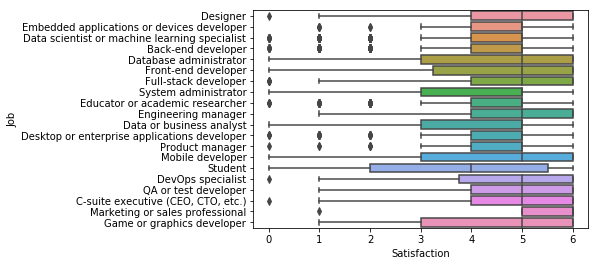

In [425]:
sns.boxplot(data=phd_dev_df, x='Satisfaction', y='Job')

In [431]:
phd_dev_df.groupby('Job').agg(['mean', 'median', 'std']).sort_values(by=('Satisfaction', 'mean'), ascending=False)

Satisfaction                 
                                                      mean median       std
Job                                                                        
Marketing or sales professional                   5.125000    6.0  1.726888
C-suite executive (CEO, CTO, etc.)                4.666667    5.0  1.662597
Designer                                          4.582418    5.0  1.535259
Product manager                                   4.477273    5.0  1.547521
Full-stack developer                              4.462295    5.0  1.572603
Game or graphics developer                        4.454545    5.0  1.710674
QA or test developer                              4.448980    5.0  1.595060
Engineering manager                               4.442857    5.0  1.638625
Educator or academic researcher                   4.407843    5.0  1.594262
Data scientist or machine learning specialist     4.405138    5.0  1.605650
Back-end developer                                4.384793    5.0  1.601630
Embedded applications or devices developer        4.355932    5.0  1.447503
Database administrator                            4.345794    5.0  1.721686
Front-end developer                               4.342697    5.0  1.646938
Desktop or enterprise applications developer      4.335294    5.0  1.568718
Data or business analyst                          4.327014    5.0  1.577273
Mobile developer                                  4.305882    5.0  1.864605
DevOps specialist                                 4.305556    5.0  1.733180
System administrator                              4.276423    5.0  1.714455
Student                                           3.684211    4.0  2.001461

## Stuff we use

In [434]:
phd_tools = df.loc[is_phd & ~is_compsci, 
                   ('DevType',
                    'LanguageWorkedWith', 'LanguageDesiredNextYear',
                    'DatabaseWorkedWith', 'DatabaseDesiredNextYear',
                    'PlatformWorkedWith', 'PlatformDesiredNextYear',
                    'FrameworkWorkedWith', 'FrameworkDesiredNextYear',
                    'IDE', 'OperatingSystem', 'VersionControl')]

In [435]:
phd_tools.head()

,DevType,LanguageWorkedWith,LanguageDesiredNextYear,DatabaseWorkedWith,DatabaseDesiredNextYear,PlatformWorkedWith,PlatformDesiredNextYear,FrameworkWorkedWith,FrameworkDesiredNextYear,IDE,OperatingSystem,VersionControl
236,Designer;Embedded applications or devices deve...,Assembly;C;C++;Matlab;Python;Bash/Shell,NaN,NaN,NaN,Linux,NaN,NaN,NaN,Eclipse;Notepad++,Linux-based,Git;Team Foundation Version Control
347,Data scientist or machine learning specialist,Groovy;Python;R;SQL;HTML;CSS;Bash/Shell,NaN,MySQL;Google BigQuery,NaN,Linux,NaN,TensorFlow,NaN,PyCharm;RStudio;Sublime Text;Vim,MacOS,Git
390,Back-end developer;Database administrator;Fron...,JavaScript;Python;SQL;HTML;CSS;Bash/Shell,NaN,Redis;PostgreSQL;Amazon DynamoDB,NaN,AWS;Linux;Serverless,NaN,Angular;Django,NaN,PyCharm;Vim,Linux-based,Git
393,Data scientist or machine learning specialist,C++;Python;R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPython / Jupyter;Notepad++;RStudio,Windows,Git
398,Data scientist or machine learning specialist;...,C++;Julia;Python,NaN,NaN,NaN,Linux,NaN,Django;TensorFlow;Torch/PyTorch,NaN,Atom;IntelliJ;Notepad++;PyCharm;Sublime Text,Linux-based,Git


In [436]:
def graph_most_used(df, col):
    agg_list = list()
    for response in df[col]:
        if response is not np.nan:
            for item in response.split(';'):
                agg_list.append(item)
    counter = Counter(agg_list)
    
    counter_df = pd.Series(dict(counter))
    counter_df = counter_df.sort_values(ascending=False)
    sns.barplot(x=counter_df, y=counter_df.index, color='royalblue')
    plt.show()

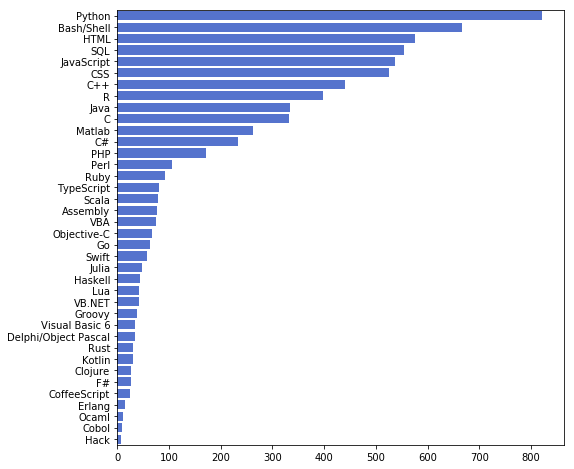

In [438]:
plt.figure(figsize=(8, 8))
graph_most_used(phd_tools, 'LanguageWorkedWith')

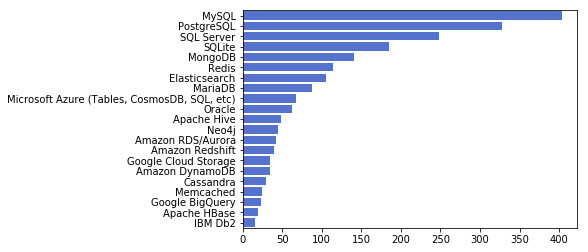

In [439]:
graph_most_used(phd_tools, 'DatabaseWorkedWith')

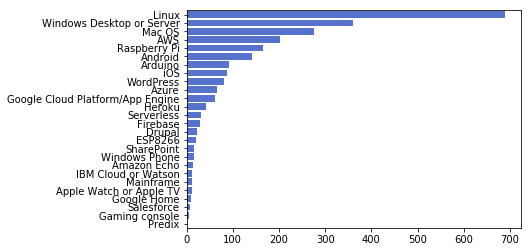

In [443]:
graph_most_used(phd_tools, 'PlatformWorkedWith')

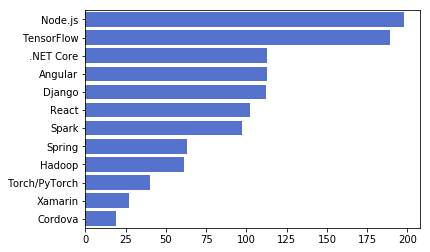

In [444]:
graph_most_used(phd_tools, 'FrameworkWorkedWith')

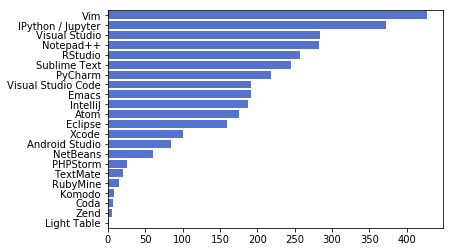

In [445]:
graph_most_used(phd_tools, 'IDE')

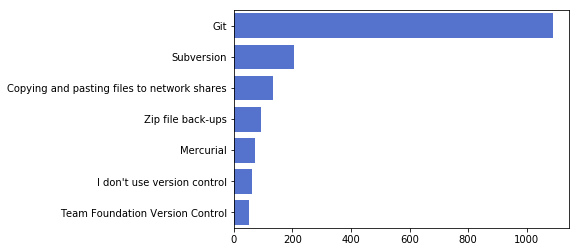

In [446]:
graph_most_used(phd_tools, 'VersionControl')

## OK, the last dealio - Predict

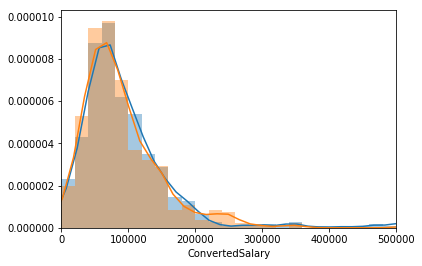

In [466]:
sns.distplot(df.loc[is_phd & ~is_compsci, 'ConvertedSalary'].dropna(), bins = 100, kde=True, norm_hist=True)
sns.distplot(df.loc[is_phd & is_compsci, 'ConvertedSalary'].dropna(), bins = 100, kde=True, norm_hist=True)
plt.xlim(0, 500000)
plt.show()

In [468]:
reg_cols = [
#     'Country',
#     'Employment',
#     'UndergradMajor',
    'CompanySize',
    'DevType',
    'YearsCoding',
#     'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'LanguageWorkedWith',
    'WakeTime',
    'HoursComputer',
    'HoursOutside',
    'SkipMeals',
    'Exercise',
#     'Gender',
#     'EducationParents',
#     'RaceEthnicity',
    'Age',
    'Dependents',
]

In [477]:
reg_df = df.loc[is_phd & ~is_compsci, reg_cols]

In [478]:
reg_df.shape

(1449, 20)

In [476]:
reg_df.isnull().sum()

Country                 0
Employment             23
UndergradMajor         90
CompanySize           299
DevType               131
YearsCoding            36
YearsCodingProf       320
ConvertedSalary       666
EducationTypes        255
LanguageWorkedWith    165
WakeTime              219
HoursComputer         220
HoursOutside          223
SkipMeals             222
Exercise              220
Gender                319
EducationParents      322
RaceEthnicity         402
Age                   310
Dependents            346
dtype: int64

In [497]:
reg_df.UndergradMajor.value_counts()

A natural science (ex. biology, chemistry, physics)                      599
Mathematics or statistics                                                273
Another engineering discipline (ex. civil, electrical, mechanical)       235
A social science (ex. anthropology, psychology, political science)        79
A humanities discipline (ex. literature, history, philosophy)             56
Information systems, information technology, or system administration     41
A business discipline (ex. accounting, finance, marketing)                25
A health science (ex. nursing, pharmacy, radiology)                       20
Fine arts or performing arts (ex. graphic design, music, studio art)      13
Web development or web design                                             12
I never declared a major                                                   6
Name: UndergradMajor, dtype: int64

In [499]:
reg_df.CompanySize.value_counts()

20 to 99 employees          206
10,000 or more employees    198
100 to 499 employees        197
1,000 to 4,999 employees    194
5,000 to 9,999 employees    111
10 to 19 employees           95
500 to 999 employees         79
Fewer than 10 employees      70
Name: CompanySize, dtype: int64

In [498]:
reg_df.columns

Index(['Country', 'Employment', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'ConvertedSalary', 'EducationTypes',
       'LanguageWorkedWith', 'WakeTime', 'HoursComputer', 'HoursOutside',
       'SkipMeals', 'Exercise', 'Gender', 'EducationParents', 'RaceEthnicity',
       'Age', 'Dependents'],
      dtype='object')

In [480]:
pprint(list(reg_df.YearsCoding.unique()))

['9-11 years',
 '15-17 years',
 '6-8 years',
 '12-14 years',
 '0-2 years',
 '21-23 years',
 '18-20 years',
 '30 or more years',
 '3-5 years',
 '24-26 years',
 '27-29 years',
 nan]


In [481]:
years_coding_mapping = {
    '0-2 years': 0,
    '3-5 years': 1,
    '6-8 years': 2,
    '9-11 years': 3,
    '12-14 years': 4,
    '15-17 years': 5,
    '18-20 years': 6,
    '21-23 years': 7,
    '24-26 years': 8,
    '27-29 years': 9,
    '30 or more years': 10, 
}

In [482]:
pprint(list(reg_df.YearsCodingProf.unique()))

['9-11 years',
 '3-5 years',
 '6-8 years',
 '0-2 years',
 '12-14 years',
 '18-20 years',
 nan,
 '21-23 years',
 '30 or more years',
 '24-26 years',
 '15-17 years',
 '27-29 years']


In [484]:
years_coding_prof_mapping = {
    '0-2 years': 0,
    '3-5 years': 1,
    '6-8 years': 2,
    '9-11 years': 3,
    '12-14 years': 4,
    '15-17 years': 5,
    '18-20 years': 6,
    '21-23 years': 7,
    '24-26 years': 8,
    '27-29 years': 9,
    '30 or more years': 10, 
}

In [506]:
pprint(list(reg_df.CompanySize.unique()))

['1,000 to 4,999 employees',
 '100 to 499 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 '10,000 or more employees',
 'Fewer than 10 employees',
 nan]


In [507]:
company_size_mapping = {
    'Fewer than 10 employees': 0,
    '10 to 19 employees': 1,
    '20 to 99 employees': 2,
    '100 to 499 employees': 3,
    '500 to 999 employees': 4,
    '1,000 to 4,999 employees': 5,
    '5,000 to 9,999 employees': 6,
    '10,000 or more employees': 7,
}

In [509]:
reg_df.WakeTime.value_counts()

Between 6:01 - 7:00 AM          423
Between 7:01 - 8:00 AM          351
Between 5:00 - 6:00 AM          182
Between 8:01 - 9:00 AM          134
I do not have a set schedule     46
Between 9:01 - 10:00 AM          40
Before 5:00 AM                   30
Between 10:01 - 11:00 AM         13
Between 11:01 AM - 12:00 PM       6
After 12:01 PM                    3
I work night shifts               2
Name: WakeTime, dtype: int64

what are the "business questions" I can ask?:  

- what percentage of the user base is phd/non-compsci?
- What are good job opportunities? as measured by popularity.
- For us, how drastically can coding affect our salary? Compared to compsci? Normalize for years in workforce?
- When coding, what tools are the most popular?

- How are compsci phds different than non-sci phds (why you should code)
- number difference
- Job differences?
- Salaray differences?
- Number roles/categories?
- Years coding / normalized by years in workforce

angst as a phd that did not study computer science
how different are we?
did i make a mistake?
- salary/happiness difference

Am i behind?

Was it a good idea to study something other than compsci?  
- Happiness / salary vs category  
Should you learn to code anyway?    
- Years coding after taking into account years experience  
What should you use if you're going to code?   
- Most popular language, editors, frameworks, etc.  
What could you eventually do?   
- Most popular jobs  

## Acknowledgments

[1] Sharon Soussan https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values